## Credit Card Fraud Detection

Objective of the project is to predict fraudulent transactions using credit cards by machine learning algorithm.

**Approach**

We will be testing multiple machine learning models to figure out the best suitable model for this activity. However, the total activity can be divide into below mentioned steps:

     --1. Data Understanding & EDA
     --2.Create multiple models based on Imbalance data
     --3.Handle Imbalance data by various technique
     --4.Create multiple models on balanced data
     --5.Choose best model based on Recall, AUC and Accuracy
     --6.Run the best model with train and test dataset and end with the final model
     --7.Visualize the best feature
     --5.Conclusion

**Important Points**

`1.True Positives (TP)`: True positives are the instances when both the actual class and the predicted class of the data point is 1 (in this case Fraud)
`2.True Negatives (TN)`: True negatives are the cases when both the actual class and the predicted class of the data point is 0 (in this case Genuine)
`3.False Positives (FP)`: False positives are the cases when the actual class of the data point was 0(Genuine) but the predicted class is 1(in this case Fraud).Or Error in Model prediction and predicted a positive/Fraud incorrectly\
`4.False Negatives (FN)`: False negatives are the cases when the actual class of the data point was 1(Fraud) but the predicted class is 0(in this case Genuine). Or Error in Model prediction and predicted a negative/Genuine incorrectly.

#### Data Understanding & EDA

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Change the file path for necessary file
df = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\Capstone Project_Credit Card Fraud Detection\310_23498_compressed_creditcard.csv (1)\creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

there is no null value present in the dataset

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


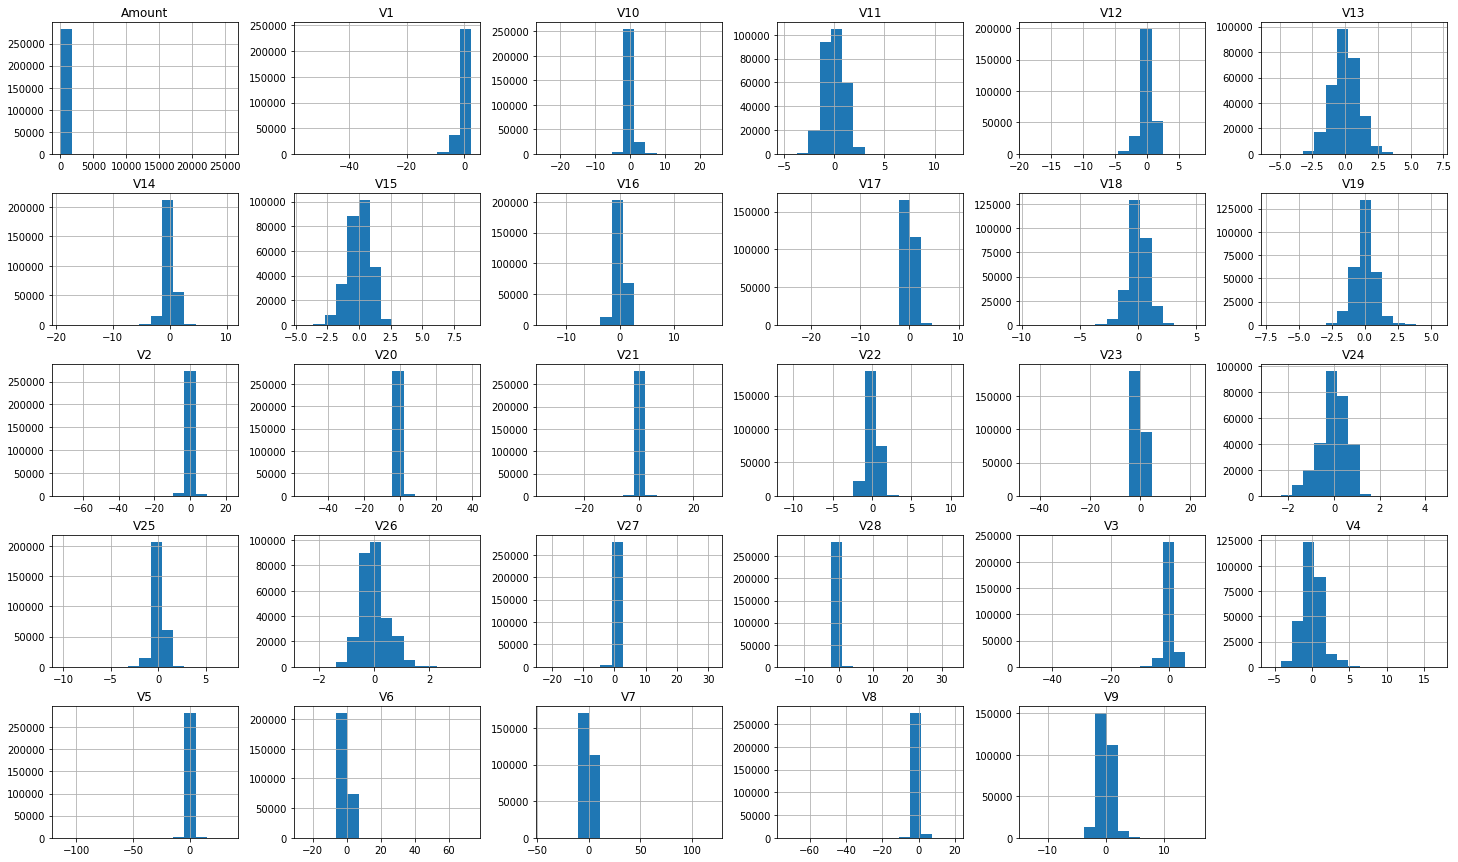

In [9]:
# Let us check the distribution visually of all the  columns from V1 to V28
numeric = list(df.iloc[:,1:-1].columns)
df[numeric].hist(bins=15, figsize=(25,15), layout=(5, 6));

We can check the skewness of the columns later

In [10]:
# Let us check if there is any column with single value
for i in df.columns:
    if len(df[i].value_counts())==1:
        print(i)

There is no column with single value

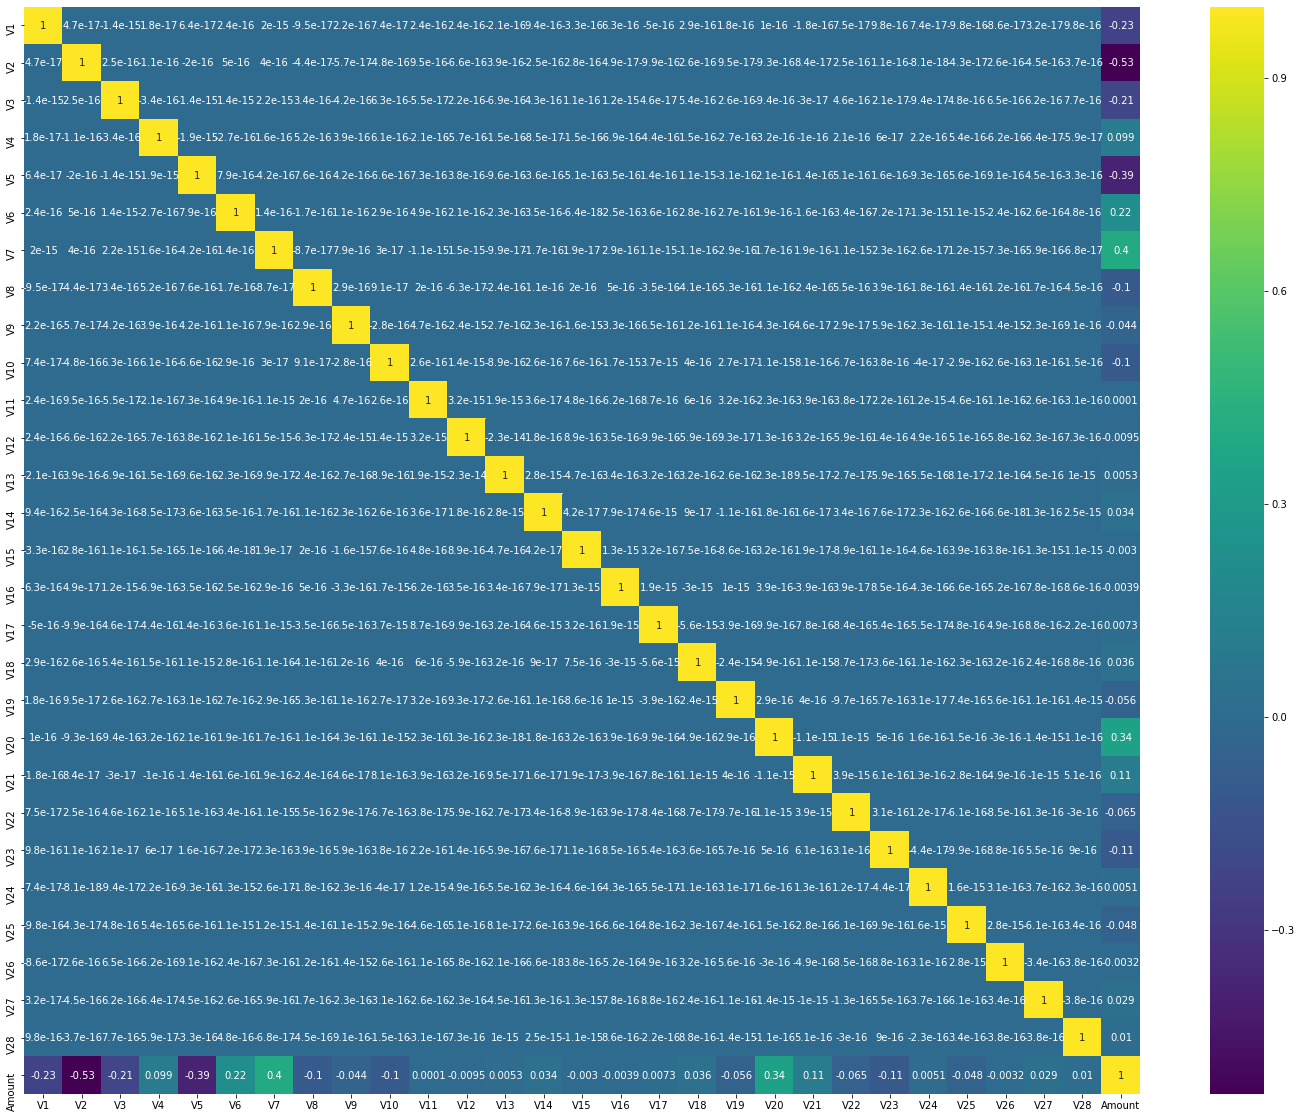

In [11]:
# Let's see the correlation matrix of these columns from V1 to V28
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(df[numeric].corr(),annot = True,cmap='viridis')
plt.show()

In [12]:
a = df.corr().abs()
b = a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
column_drop = [i for i in b.columns if any(b[i] > 0.80)]
column_drop

[]

  It seems, there is not much correlation present between the columns.\
  Let us check the distribution of time and Amount column along with Class

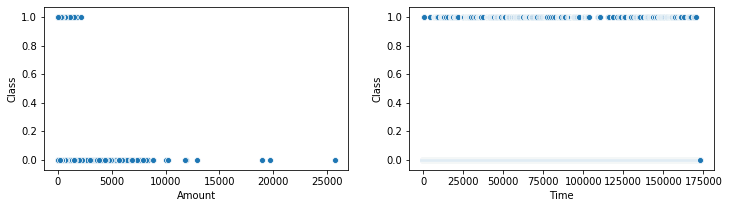

In [13]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Amount',y = 'Class',data = df)

plt.subplot(1,2,2)
sns.scatterplot(x = 'Time',y = 'Class',data = df)

We can see Class = 1 or fradulent transaction is limited to less than 5000 dollar where as normal transaction value has extreme value with 25000 dollar.

Text(0, 0.5, 'Probability Density')

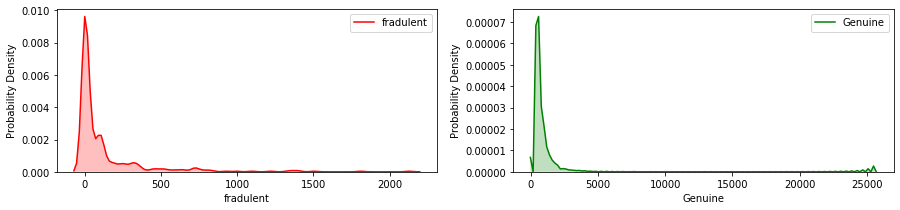

In [14]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(df[df['Class']==1]['Amount'],color = 'r',shade = True,Label = 'fradulent')
plt.xlabel('fradulent') 
plt.ylabel('Probability Density')
plt.subplot(1,2,2)
sns.kdeplot(df[df['Class']==0]['Amount'],color = 'g',shade = True,Label = 'Genuine')
plt.xlabel('Genuine') 
plt.ylabel('Probability Density')
#plt.subplot(1,2,2)
#sns.kdeplot(df['Time'],color = 'r',shade = True,Label = 'Time')

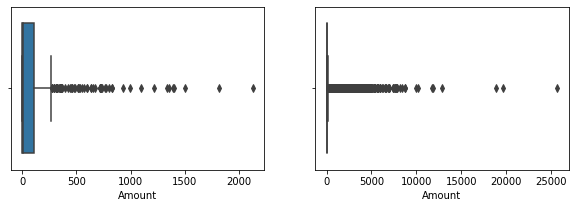

In [15]:
# let us see the fradulent and non-fradulent transaction with box plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot('Amount',data = df[df['Class']==1])
plt.subplot(1,2,2)
sns.boxplot('Amount',data = df[df['Class']==0])

Let us check how many fraud transactions are present with amount 0

In [16]:
df[(df['Class']==1)&(df['Amount']==0)]['Amount'].value_counts()

0.0    27
Name: Amount, dtype: int64

Hence we can see that there are total 27 unauthorised transactions are there where amount spend is 0 dollar. These transactions might be for account verification purpose.

It also can be seen from the above graphs that there are outliers in non-fraud transactions. However, removing the outliers from the dataset might lead to loss of information related to fraud-transactions. Hence let us keep the outliers

Let us understand the time column

Text(0, 0.5, 'Probability Density')

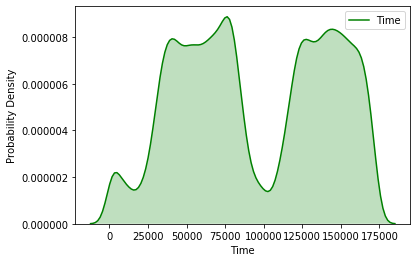

In [17]:
sns.kdeplot(df['Time'],color = 'g',shade = True,Label = 'Time')
plt.xlabel('Time') 
plt.ylabel('Probability Density')

If we can see the Time column, there are spike in two places and dip in subsequent areas. It is due to the transaction occurance time mostly in day time/working hours/business hours. However, we can assume that whereever there is a dip that belongs to night/odd hours of the day

Let us check the Class column:

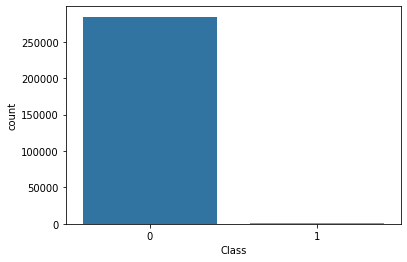

In [18]:
sns.countplot(x = 'Class',data = df)

We can see that dataset is highly imbalanced

In [19]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share,fraud_share)

99.82725143693798 0.1727485630620034


Only 0.173% of the data is fraud transaction. We can deal with this later

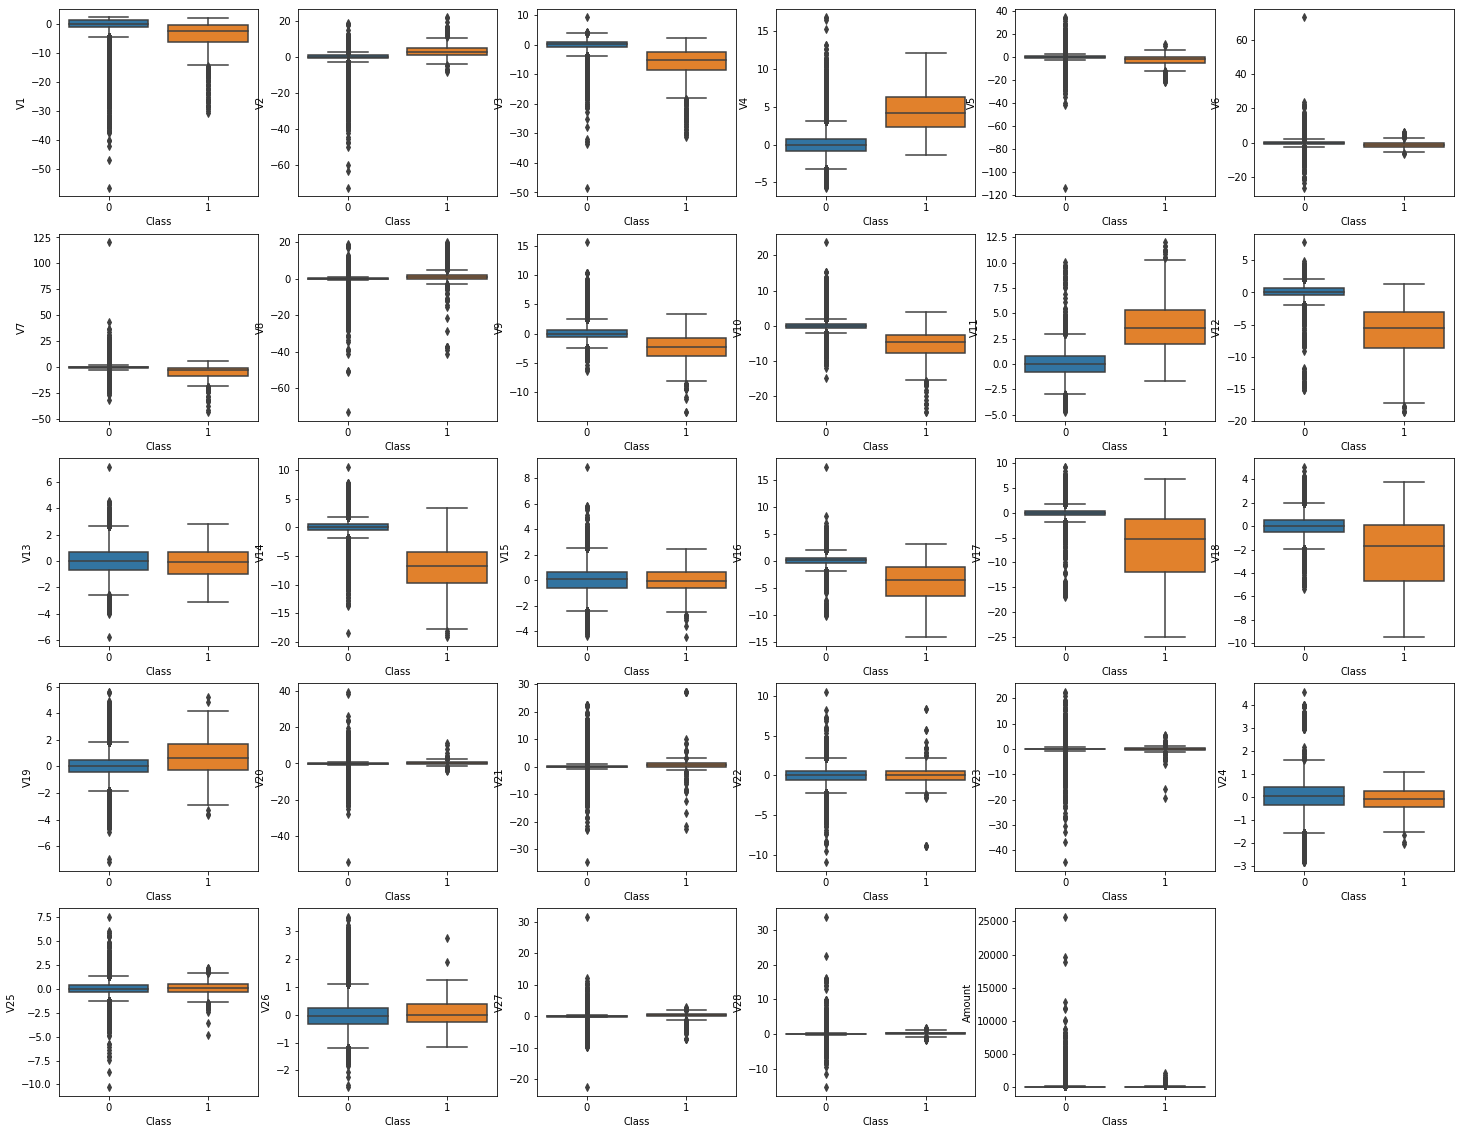

In [20]:
plt.figure(figsize=(25,20))
plt.subplot(5,6,1)
sns.boxplot(x = 'Class', y = 'V1', data = df)
plt.subplot(5,6,2)
sns.boxplot(x = 'Class', y = 'V2', data = df)
plt.subplot(5,6,3)
sns.boxplot(x = 'Class', y = 'V3', data = df)
plt.subplot(5,6,4)
sns.boxplot(x = 'Class', y = 'V4', data = df)
plt.subplot(5,6,5)
sns.boxplot(x = 'Class', y = 'V5', data = df)
plt.subplot(5,6,6)
sns.boxplot(x = 'Class', y = 'V6', data = df)
plt.subplot(5,6,7)
sns.boxplot(x = 'Class', y = 'V7', data = df)
plt.subplot(5,6,8)
sns.boxplot(x = 'Class', y = 'V8', data = df)
plt.subplot(5,6,9)
sns.boxplot(x = 'Class', y = 'V9', data = df)
plt.subplot(5,6,10)
sns.boxplot(x = 'Class', y = 'V10', data = df)
plt.subplot(5,6,11)
sns.boxplot(x = 'Class', y = 'V11', data = df)
plt.subplot(5,6,12)
sns.boxplot(x = 'Class', y = 'V12', data = df)
plt.subplot(5,6,13)
sns.boxplot(x = 'Class', y = 'V13', data = df)
plt.subplot(5,6,14)
sns.boxplot(x = 'Class', y = 'V14', data = df)
plt.subplot(5,6,15)
sns.boxplot(x = 'Class', y = 'V15', data = df)
plt.subplot(5,6,16)
sns.boxplot(x = 'Class', y = 'V16', data = df)
plt.subplot(5,6,17)
sns.boxplot(x = 'Class', y = 'V17', data = df)
plt.subplot(5,6,18)
sns.boxplot(x = 'Class', y = 'V18', data = df)
plt.subplot(5,6,19)
sns.boxplot(x = 'Class', y = 'V19', data = df)
plt.subplot(5,6,20)
sns.boxplot(x = 'Class', y = 'V20', data = df)
plt.subplot(5,6,21)
sns.boxplot(x = 'Class', y = 'V21', data = df)
plt.subplot(5,6,22)
sns.boxplot(x = 'Class', y = 'V22', data = df)
plt.subplot(5,6,23)
sns.boxplot(x = 'Class', y = 'V23', data = df)
plt.subplot(5,6,24)
sns.boxplot(x = 'Class', y = 'V24', data = df)
plt.subplot(5,6,25)
sns.boxplot(x = 'Class', y = 'V25', data = df)
plt.subplot(5,6,26)
sns.boxplot(x = 'Class', y = 'V26', data = df)
plt.subplot(5,6,27)
sns.boxplot(x = 'Class', y = 'V27', data = df)
plt.subplot(5,6,28)
sns.boxplot(x = 'Class', y = 'V28', data = df)
plt.subplot(5,6,29)
sns.boxplot(x = 'Class', y = 'Amount', data = df)

In [21]:
# Let us scale the Amount column before further processing
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### First Approach: Create Model with imbalance dataset

In [23]:
# take a copy of the data for 1st aproach
df_approach_1 = df.copy()

 **Model 1: Logistic Regression**

In [24]:
#take a copy of the data
df_app_1_lr = df_approach_1.copy()

Handling skewness of a column is necessary in order to get a good model performance when we are using Linear or Logistic Regression models.**Because Linear & Logistic Regression assumes that variables are normally distributed and there is a linear relationship between independant and dependant variable.** 
To understand how much a column is normally distributed, we would requrie help of `Q-Q Plot`

In [25]:
import scipy.stats as stats

In [26]:
#create the function for the Histogram & Q-Q Plot
def dist_verify(df,feature):
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title('Probability Plot: '+df[feature].name)
    plt.show()

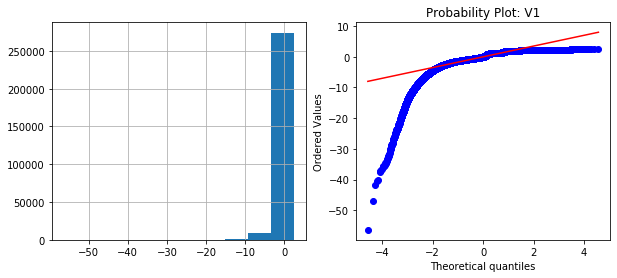

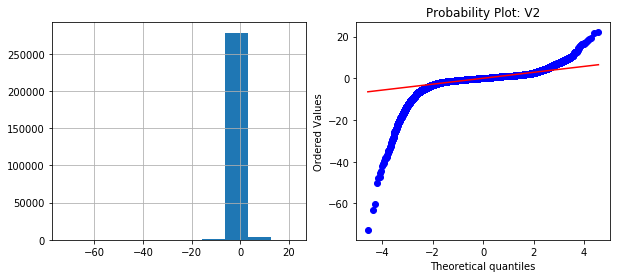

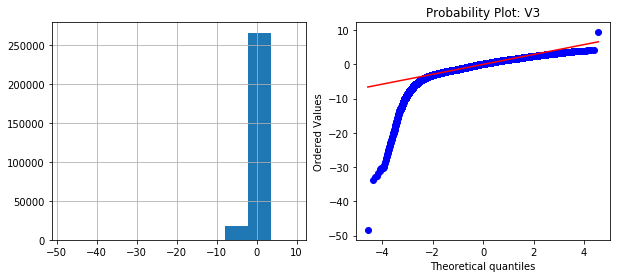

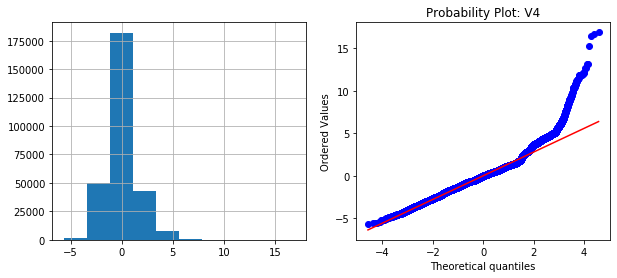

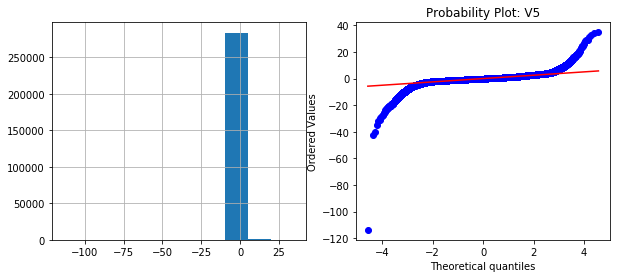

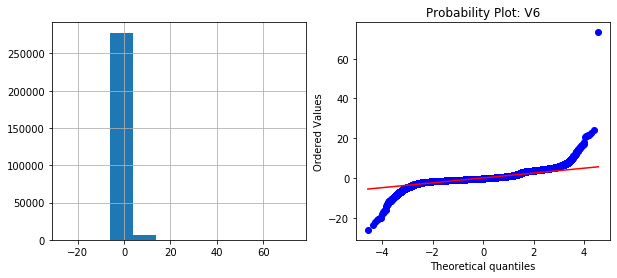

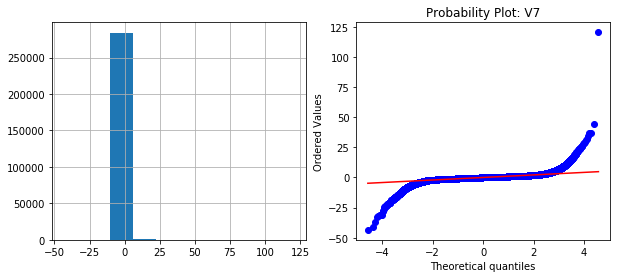

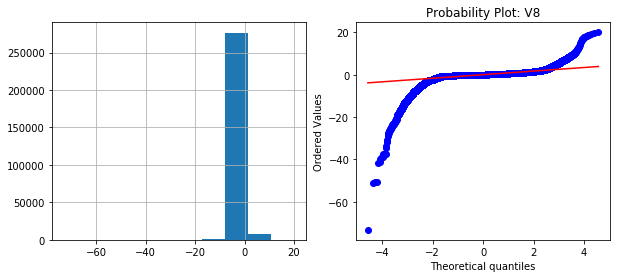

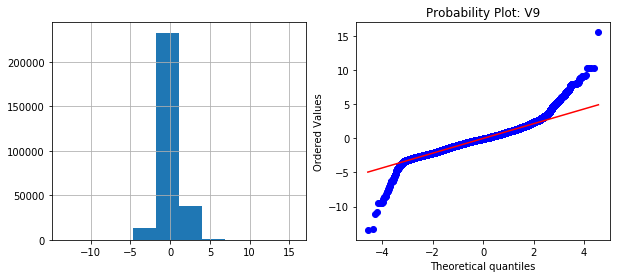

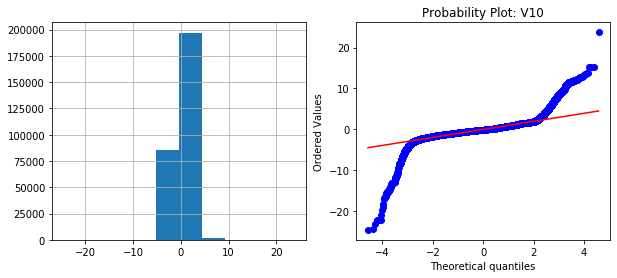

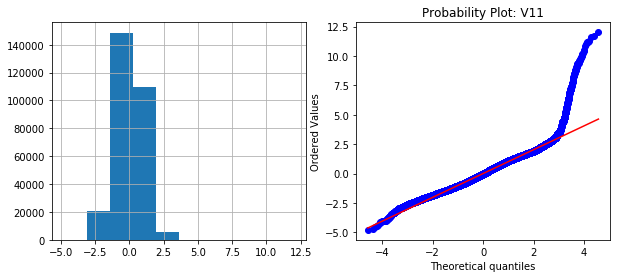

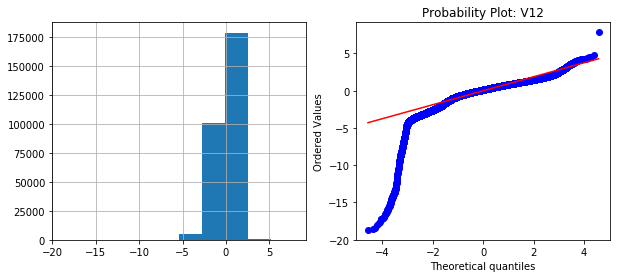

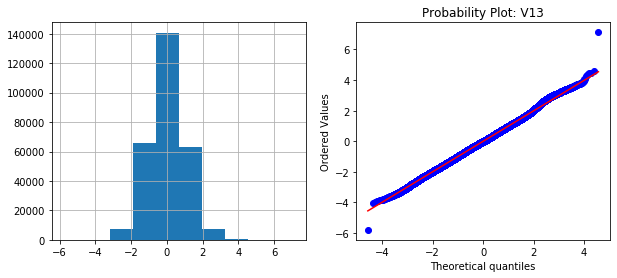

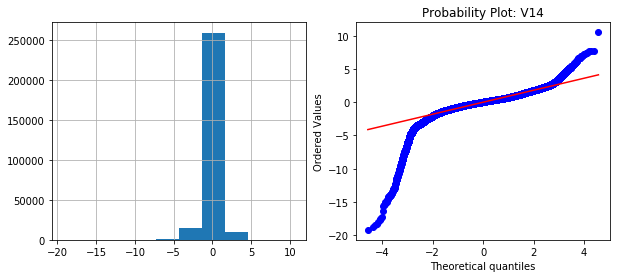

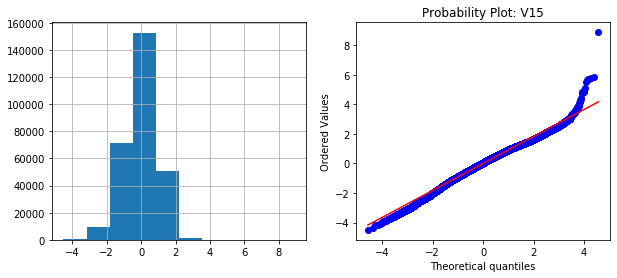

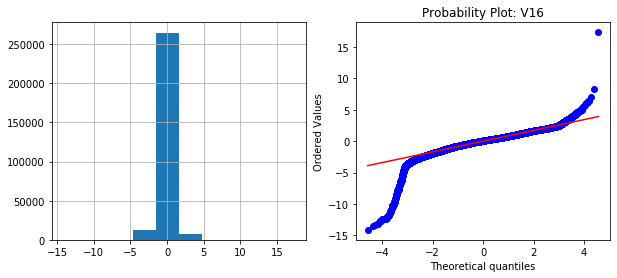

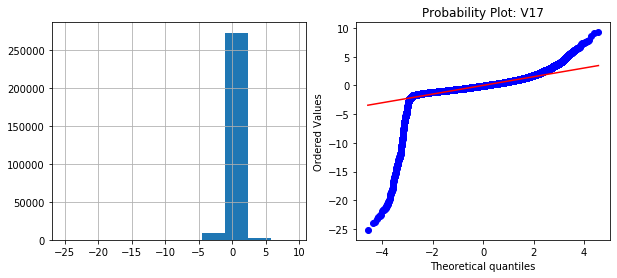

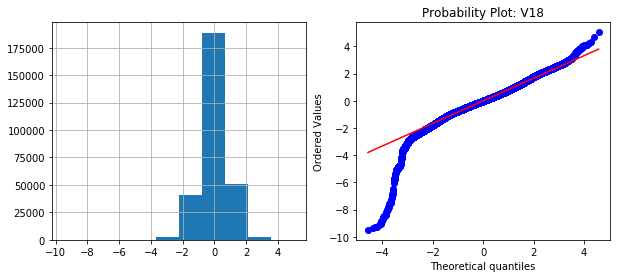

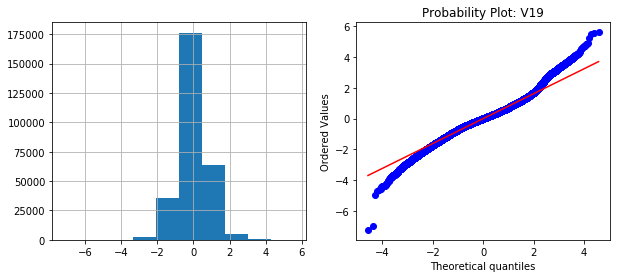

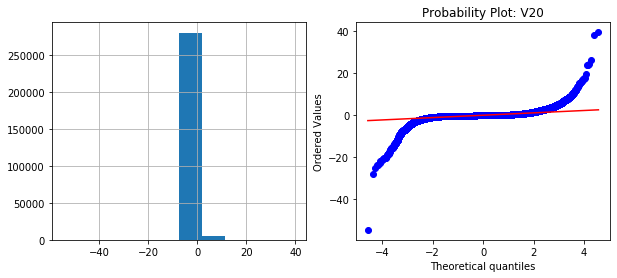

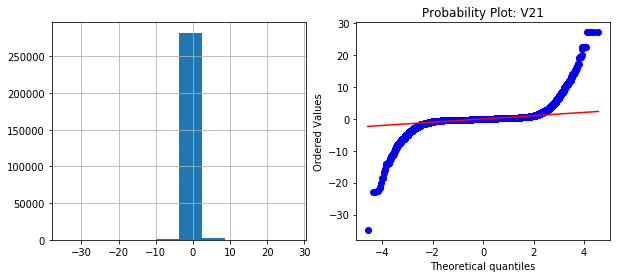

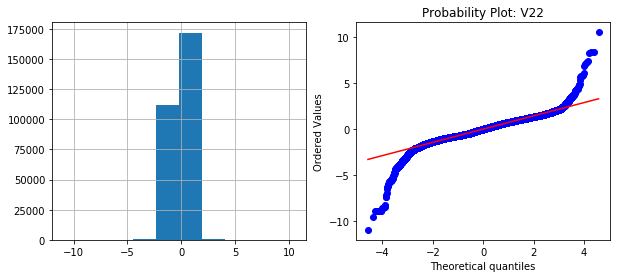

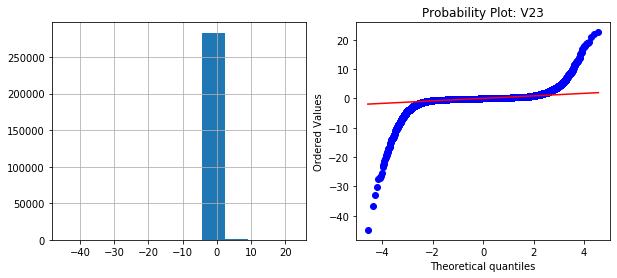

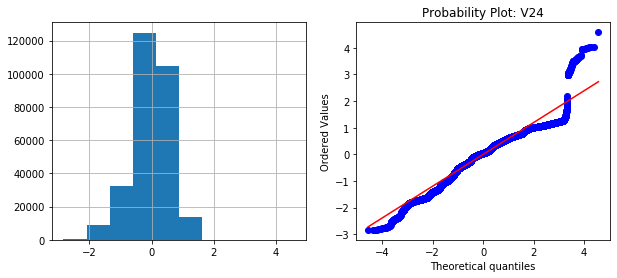

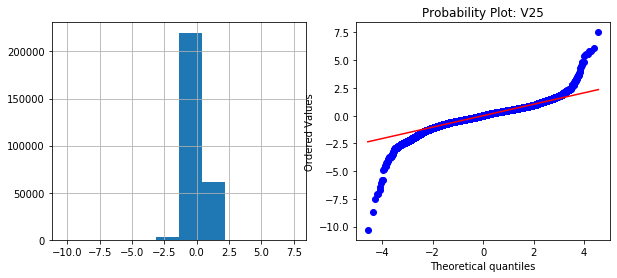

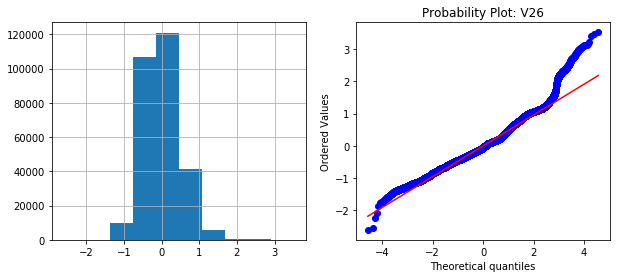

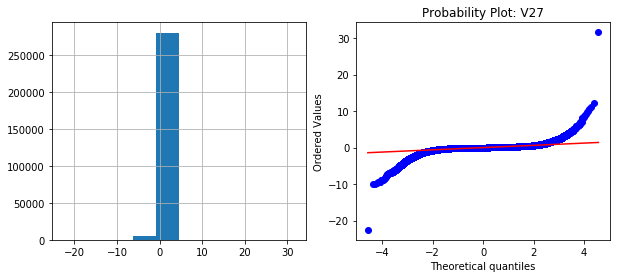

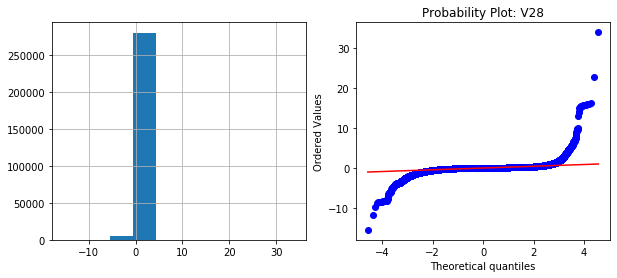

In [27]:
for i in range(1,29):
    dist_verify(df_app_1_lr,'V'+str(i))

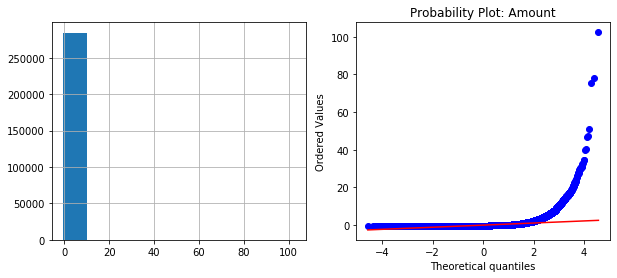

In [28]:
dist_verify(df_app_1_lr,'Amount')

from the above histogram graph, we can see that amount column is rightly skewed and it require to be handled which can be done with the help of log transformation.

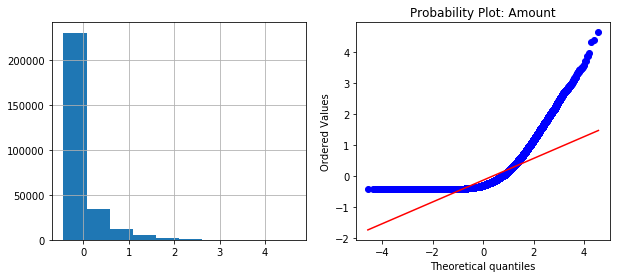

In [29]:
df_app_1_lr['Amount']=np.log(df_app_1_lr['Amount']+1)
# we are adding 1 to the column value before log transformation in order to avoid issues with value which is 0. However, for
# other values, log transformation with +1 will have very negligible differnece
dist_verify(df_app_1_lr,'Amount')

In [30]:
df_app_1_lr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.219107,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.419272,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.770426,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.131497,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.076237,0


In [31]:
# Store independant variables to X
X = df_app_1_lr.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df_app_1_lr['Class']

In [32]:
X.shape,y.shape

((284807, 29), (284807,))

#### Imbalance Data | Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
logreg = LogisticRegression()

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1
                           )
grid_search = grid_search.fit(X,y)

In [36]:
accuracy = grid_search.best_score_
# the grid search accuracy is:
accuracy

0.9991257240683618

In [37]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,accuracy_score

In [39]:
accuracy = []
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
for train_index,test_index in kf.split(X,y):
    print("Train: ", train_index,"Validation: ", test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    logreg = LogisticRegression(C= 10, penalty= 'l2')
    logreg.fit(X1_train,y1_train)
    prediction = logreg.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    13     18     37 ... 284792 284795 284797]
Train:  [     0      1      2 ... 284801 284802 284803] Validation:  [     4     29     70 ... 284804 284805 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     9     14     19 ... 284787 284799 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    10     12     15 ... 284761 284775 284789]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    11     24     35 ... 284740 284759 284782]
Train:  [     0      2      3 ... 284804 284805 284806] Validation:  [     1     16     23 ... 284773 284793 284802]
Train:  [     0      1      3 ... 284804 284805 284806] Validation:  [     2      5      8 ... 284755 284785 284791]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     6     20     28 ... 284776 284779 284796]
Train:  [     1      2      4 ... 284804 284805 284806] Validati

In [40]:
confusion_matrix = confusion_matrix(y1_test,prediction)
print(confusion_matrix)

[[28424     7]
 [   20    29]]


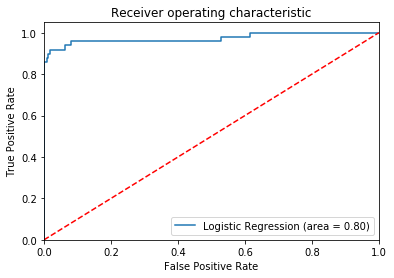

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.81      0.59      0.68        49

    accuracy                           1.00     28480
   macro avg       0.90      0.80      0.84     28480
weighted avg       1.00      1.00      1.00     28480



In [44]:
# accuracy of the model:
np.array(accuracy).mean()

0.9992205247269123

In [45]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.5918367346938775

In [46]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.8055555555555556


`sensitivity or Recall or True Positive Rate (TPR):` In simple words it is the frequency of correctly predicted true labels. In this case how correctly we catch the fraud transactions\
`Positive predictive value 0r Precision:` Precision is the proportion of true positives out of predicted positives. In simple words,  it is the accuracy of the prediction.\
`Specificity or True Negative Rate (TNR):` In simple words, it is the frequency of correctly predicted false labels.In this case how correctly we predict the normal transactions

Hence, we can see the Recall is the important criteria to measure the model performace here. We can see that though accuracy of the model is 99.92% precision is 80.555% but recall is only 59.18 % & AUC = 0.80

#### Imbalance Data | Decision Tree

We do not require to handle skewness of the data here as Tree based models do not have any assumption and they can handle it

In [47]:
# Putting feature variable to X
X = df_approach_1.drop(['Time','Class'],axis=1)
# Putting response variable to y
y = df_approach_1['Class']

In [48]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [49]:
#initiate decision tree object
dtree = DecisionTreeClassifier()

In [50]:
dt_accuracy = []
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
for train_index,test_index in kf.split(X,y):
    print("Train: ", train_index,"Validation: ", test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    dtree.fit(X1_train,y1_train)
    prediction = dtree.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    dt_accuracy.append(score)
print(dt_accuracy)

Train:  [     0      1      3 ... 284802 284805 284806] Validation:  [     2      8     17 ... 284792 284803 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    10     20     43 ... 284754 284769 284785]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    19     21     29 ... 284787 284796 284799]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     4     11     12 ... 284784 284791 284797]
Train:  [     0      1      2 ... 284803 284804 284805] Validation:  [     6     13     14 ... 284790 284794 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    23     33     41 ... 284779 284793 284798]
Train:  [     1      2      4 ... 284804 284805 284806] Validation:  [     0      3     25 ... 284763 284781 284800]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     5     30     38 ... 284780 284786 284802]
Train:  [     0      1      2 ... 284803 284804 284806] Validati

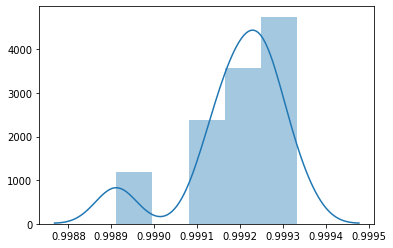

In [51]:
sns.distplot(dt_accuracy)

In [52]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_test,prediction)
print(confusion)

[[28418    13]
 [   11    38]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.75      0.78      0.76        49

    accuracy                           1.00     28480
   macro avg       0.87      0.89      0.88     28480
weighted avg       1.00      1.00      1.00     28480



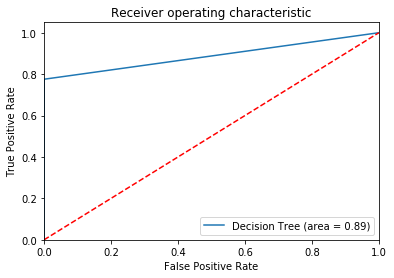

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, dtree.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, dtree.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [56]:
# accuracy of the model:
np.array(dt_accuracy).mean()

0.9991924357022561

In [57]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7755102040816326

In [58]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.7450980392156863


Accuracy is 99.91% but recall is 77.551% here.Also AUC= 0.89. We can see Decision Tree is performing better than logistic regression

#### Imbalance Data | XG Boost

In [59]:
# Putting feature variable to X
X = df_approach_1.drop(['Time','Class'],axis=1)
# Putting response variable to y
y = df_approach_1['Class']

In [60]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [61]:
from sklearn.model_selection import StratifiedKFold
xg_accuracy=[]
xgb = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
xgb.get_n_splits(X,y)
for train_index,test_index in xgb.split(X,y):
    print("Train: ",train_index,"Validation: ",test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    xg_accuracy.append(score)
print(xg_accuracy)

Train:  [     1      2      3 ... 284804 284805 284806] Validation:  [     0     14     25 ... 284754 284776 284792]
Train:  [     0      1      2 ... 284802 284803 284805] Validation:  [    37     38     58 ... 284796 284804 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    12     39     46 ... 284780 284782 284787]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     5      8      9 ... 284790 284795 284798]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    11     17     18 ... 284785 284797 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    22     23     26 ... 284778 284784 284794]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    10     15     19 ... 284775 284789 284793]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     4      7     13 ... 284791 284799 284802]
Train:  [     0      4      5 ... 284804 284805 284806] Validati

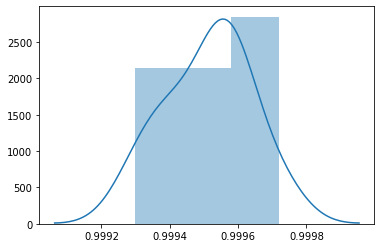

In [62]:
sns.distplot(xg_accuracy)

In [63]:
from sklearn.metrics import confusion_matrix
confusion1 = confusion_matrix(y1_test,prediction)
print(confusion1)

[[28422     9]
 [    9    40]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.82      0.82      0.82        49

    accuracy                           1.00     28480
   macro avg       0.91      0.91      0.91     28480
weighted avg       1.00      1.00      1.00     28480



In [65]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995119491744744

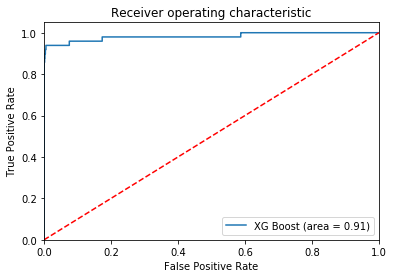

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [67]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [68]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.8163265306122449

In [69]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.8163265306122449


Here accuracy is 99.952% and Recall is 81.632%.AUC = 0.91 This model is better than Decision Tree & Logistic Regression

####  Imbalance Data | Random Forest

In [70]:
# Putting feature variable to X
X = df_approach_1.drop(['Time','Class'],axis=1)
# Putting response variable to y
y = df_approach_1['Class']

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model_reg = RandomForestClassifier()

In [73]:
from sklearn.model_selection import StratifiedKFold
rf_accuracy=[]
rfc = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
rfc.get_n_splits(X,y)
for train_index,test_index in rfc.split(X,y):
    print("Train: ",train_index,"Validation: ",test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    model_reg.fit(X1_train,y1_train)
    prediction = model_reg.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    rf_accuracy.append(score)
print(rf_accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     5      6     13 ... 284788 284791 284794]
Train:  [     0      1      2 ... 284803 284804 284805] Validation:  [    19     53     59 ... 284785 284802 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    15     20     30 ... 284790 284799 284803]
Train:  [     1      2      3 ... 284803 284805 284806] Validation:  [     0      4      9 ... 284783 284796 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    12     23     34 ... 284778 284784 284787]
Train:  [     0      1      3 ... 284804 284805 284806] Validation:  [     2     31     43 ... 284727 284771 284797]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    16     45     72 ... 284793 284798 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     7      8     14 ... 284777 284779 284789]
Train:  [     0      2      4 ... 284804 284805 284806] Validati

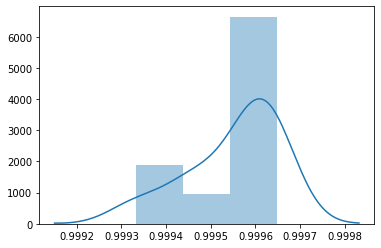

In [74]:
sns.distplot(rf_accuracy)

In [75]:
from sklearn.metrics import confusion_matrix
confusion2 = confusion_matrix(y1_test,prediction)
print(confusion2)

[[28428     3]
 [   13    36]]


In [76]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995119491744744

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.92      0.73      0.82        49

    accuracy                           1.00     28480
   macro avg       0.96      0.87      0.91     28480
weighted avg       1.00      1.00      1.00     28480



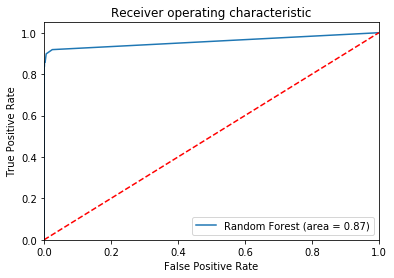

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, model_reg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_reg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7346938775510204

In [81]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.9230769230769231


Here accuracy is 97.14% and Recall is 69.387%.AUC = 0.85. This model is  not good as XG Boost. Hence as of now XG boost is working as best model on imbalanced dataset

### XG Boost with Hyperparameter Tuning on Approach 1 (Final Model on imbalanced dataset)

In [94]:
# Store independant variables to X
X = df_approach_1.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df_approach_1['Class']

In [95]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [96]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [97]:
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [98]:
random_search = random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  5.3min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.1min finished


In [99]:
accuracy = random_search.best_score_
# the random search accuracy is:
accuracy

0.999403104805044

In [100]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [101]:
classifier=xgboost.XGBClassifier(
 learning_rate =0.15,
 n_estimators=100,
 max_depth=6,
 min_child_weight=1,
 gamma=0.2,
 subsample=1.0,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 nthread=None,
 scale_pos_weight=1,
 seed=None)

In [102]:
from sklearn.model_selection import StratifiedKFold
xg_accuracy=[]
xgb = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
xgb.get_n_splits(X,y)
for train_index,test_index in xgb.split(X,y):
    print("Train: ",train_index,"Validatio: ",test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    xg_accuracy.append(score)
print(xg_accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     4     12     35 ... 284760 284778 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     3      7      8 ... 284758 284765 284779]
Train:  [     1      3      4 ... 284804 284805 284806] Validatio:  [     0      2     20 ... 284762 284763 284764]
Train:  [     0      2      3 ... 284803 284804 284806] Validatio:  [     1     10     16 ... 284786 284792 284805]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     5     28     34 ... 284796 284798 284802]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    56     59     76 ... 284788 284790 284795]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    13     40     41 ... 284791 284799 284800]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    14     15     21 ... 284768 284774 284787]
Train:  [     0      1      2 ... 284802 284803 284805] Validatio:  [   

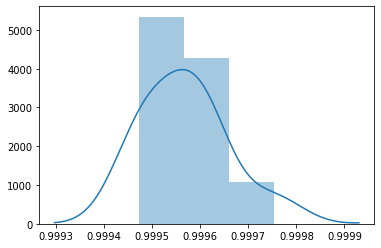

In [103]:
sns.distplot(xg_accuracy)

In [104]:
from sklearn.metrics import confusion_matrix
confusion3 = confusion_matrix(y1_test,prediction)
print(confusion3)

[[28429     2]
 [    9    40]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.95      0.82      0.88        49

    accuracy                           1.00     28480
   macro avg       0.98      0.91      0.94     28480
weighted avg       1.00      1.00      1.00     28480



In [106]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995681288264716

In [107]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [108]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.8163265306122449

In [109]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.9523809523809523


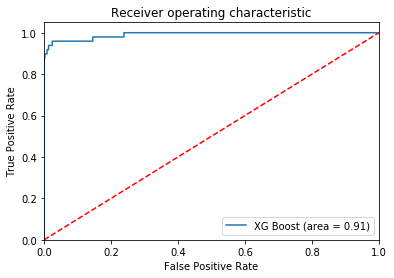

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

We can see that with the help of hyperparameter tuning, we can get very high AUC and recall value from XG Boost technique

### Second Approach: Create Model with balance dataset

### Make the dataset  balanced

In [111]:
# Import SMORT and ADASYN
from imblearn.over_sampling import SMOTE, ADASYN

In [112]:
# Store independant variables to X
X = df.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df['Class']

In [113]:
print(X.shape,y.shape)

(284807, 29) (284807,)


In [114]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**SMOTE Resample**

In [115]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [116]:
print(y_smote.value_counts())

1    284315
0    284315
Name: Class, dtype: int64


In [117]:
X_smote_1 = X_smote.copy()

In [118]:
y_smote_1 = y_smote.copy()

**ADASYN Resample**

In [119]:
# Store independant variables to X
X = df.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df['Class']

In [120]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [121]:
X_ada, y_ada = ADASYN().fit_resample(X, y)

In [122]:
y_ada.value_counts()

0    284315
1    284307
Name: Class, dtype: int64

((array([-4.7132512 , -4.52930764, -4.42973371, ...,  4.42973371,
          4.52930764,  4.7132512 ]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.39894783707248543, 0.5, 0.7978886603521971))

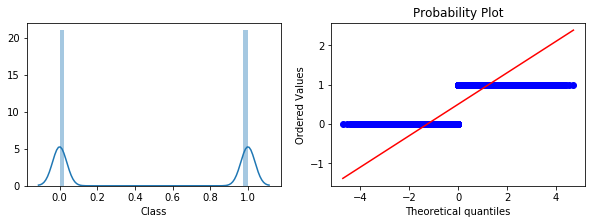

In [123]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.distplot(y_smote)
plt.subplot(1, 2, 2)
stats.probplot(y_smote, dist="norm", plot=plt)

((array([-4.71324833, -4.52930467, -4.42973068, ...,  4.42973068,
          4.52930467,  4.71324833]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.3989478370824804, 0.4999929654498067, 0.7978886603594418))

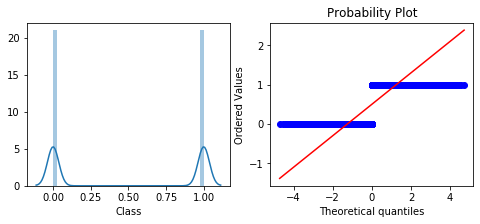

In [124]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.distplot(y_ada)
plt.subplot(1, 2, 2)
stats.probplot(y_ada, dist="norm", plot=plt)

In imbalanced dataset we have seent logistic regression is not giving a good result. Hence, here on we can remove Logistic regression and continue with Decision Tree, Random Forest & XG Boost

#### Balanced Dataset with SMOTE | Decision Tree

In [125]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [126]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

In [127]:
dt_accuracy = []
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
for train_index,test_index in kf.split(X,y):
    print("Train: ", train_index,"Validation: ", test_index)
    X1_train,X1_test = X_smote.iloc[train_index],X_smote.iloc[test_index]
    y1_train,y1_test = y_smote.iloc[train_index],y_smote.iloc[test_index]
    dtree.fit(X1_train,y1_train)
    prediction = dtree.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    dt_accuracy.append(score)
print(dt_accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    13     16     31 ... 284788 284792 284798]
Train:  [     0      1      2 ... 284803 284805 284806] Validation:  [     6     15     26 ... 284789 284799 284804]
Train:  [     0      2      3 ... 284804 284805 284806] Validation:  [     1      4     25 ... 284782 284800 284803]
Train:  [     0      1      4 ... 284803 284804 284806] Validation:  [     2      3      8 ... 284767 284796 284805]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    22     34     36 ... 284762 284795 284797]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    12     19     20 ... 284777 284784 284785]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     9     11     29 ... 284775 284787 284801]
Train:  [     1      2      3 ... 284804 284805 284806] Validation:  [     0      5     21 ... 284774 284786 284793]
Train:  [     0      1      2 ... 284803 284804 284805] Validati

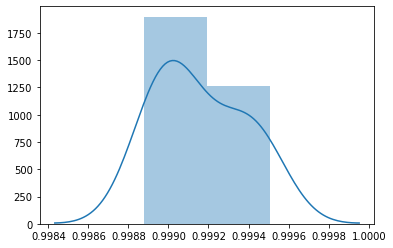

In [128]:
sns.distplot(dt_accuracy)

In [129]:
from sklearn.metrics import confusion_matrix
balanced_confusion1 = confusion_matrix(y1_test,prediction)
print(balanced_confusion1)

[[28413    18]
 [   10    39]]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.68      0.80      0.74        49

    accuracy                           1.00     28480
   macro avg       0.84      0.90      0.87     28480
weighted avg       1.00      1.00      1.00     28480



In [131]:
# accuracy of the model:
np.array(dt_accuracy).mean()

0.9991573238358393

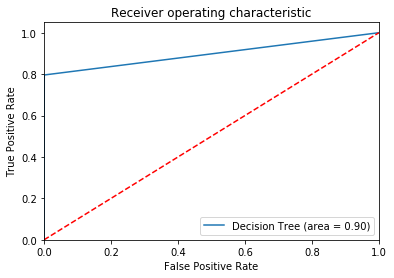

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, dtree.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, dtree.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [133]:
TP = balanced_confusion1[1,1] # true positive 
TN = balanced_confusion1[0,0] # true negatives
FP = balanced_confusion1[0,1] # false positives
FN = balanced_confusion1[1,0] # false negatives

In [134]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7959183673469388

In [135]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.6842105263157895


Now we can see that Accuracy =99.91%,Recall = 75.510% & AUC = 0.88

####  Balanced Dataset with SMOTE | Random Forest

In [136]:
X_smote = X_smote_1.copy()

In [137]:
y_smote = y_smote_1.copy()

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model_reg = RandomForestClassifier()

In [140]:
from sklearn.model_selection import StratifiedKFold
rf_accuracy=[]
rfc = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
rfc.get_n_splits(X,y)
for train_index,test_index in rfc.split(X,y):
    print("Train: ",train_index,"Validatio: ",test_index)
    X1_train,X1_test = X_smote.iloc[train_index],X_smote.iloc[test_index]
    y1_train,y1_test = y_smote.iloc[train_index],y_smote.iloc[test_index]
    model_reg.fit(X1_train,y1_train)
    prediction = model_reg.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    rf_accuracy.append(score)
print(rf_accuracy)

Train:  [     0      1      2 ... 284803 284804 284806] Validatio:  [     9     25     30 ... 284786 284793 284805]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     3     23     27 ... 284783 284789 284796]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    11     16     28 ... 284787 284800 284803]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     7     15     19 ... 284757 284779 284798]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    17     32     52 ... 284791 284797 284799]
Train:  [     0      1      2 ... 284803 284804 284805] Validatio:  [    10     12     33 ... 284792 284794 284806]
Train:  [     0      2      3 ... 284804 284805 284806] Validatio:  [     1      4     13 ... 284788 284795 284802]
Train:  [     1      2      3 ... 284804 284805 284806] Validatio:  [     0     24     36 ... 284765 284785 284801]
Train:  [     0      1      3 ... 284803 284805 284806] Validatio:  [   

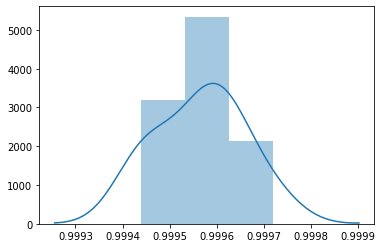

In [141]:
sns.distplot(rf_accuracy)

In [142]:
from sklearn.metrics import confusion_matrix
balanced_confusion2 = confusion_matrix(y1_test,prediction)
print(balanced_confusion2)

[[28430     1]
 [   12    37]]


In [143]:
# accuracy of the model:
np.array(rf_accuracy).mean()

0.9995646179603671

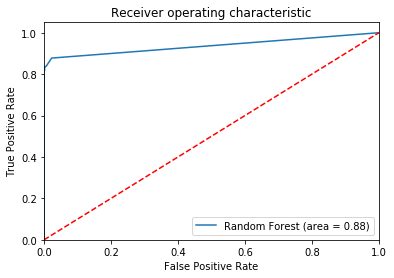

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, model_reg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_reg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [145]:
TP = balanced_confusion2[1,1] # true positive 
TN = balanced_confusion2[0,0] # true negatives
FP = balanced_confusion2[0,1] # false positives
FN = balanced_confusion2[1,0] # false negatives

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.97      0.76      0.85        49

    accuracy                           1.00     28480
   macro avg       0.99      0.88      0.93     28480
weighted avg       1.00      1.00      1.00     28480



In [147]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7551020408163265

In [148]:
# calculate specificity
TN / float(TN+FP)

0.999964827125321

####  Balanced Dataset with SMOTE | XG Boost

In [149]:
X_smote = X_smote_1.copy()

In [150]:
y_smote = y_smote_1.copy()

In [151]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [152]:
from sklearn.model_selection import StratifiedKFold
xg_accuracy=[]
xgb = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
xgb.get_n_splits(X,y)
for train_index,test_index in xgb.split(X,y):
    print("Train: ",train_index,"Validatio: ",test_index)
    X1_train,X1_test = X_smote.iloc[train_index],X_smote.iloc[test_index]
    y1_train,y1_test = y_smote.iloc[train_index],y_smote.iloc[test_index]
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    xg_accuracy.append(score)
print(xg_accuracy)

Train:  [     0      1      2 ... 284803 284804 284805] Validatio:  [     5     12     13 ... 284795 284798 284806]
Train:  [     0      1      2 ... 284803 284804 284806] Validatio:  [     4     10     24 ... 284784 284790 284805]
Train:  [     0      1      2 ... 284803 284805 284806] Validatio:  [    17     34     35 ... 284770 284788 284804]
Train:  [     1      2      3 ... 284804 284805 284806] Validatio:  [     0      6     15 ... 284792 284799 284803]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     9     23     30 ... 284785 284786 284797]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    14     22     33 ... 284733 284778 284793]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     3     11     31 ... 284760 284771 284789]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     8     21     40 ... 284754 284763 284764]
Train:  [     0      2      3 ... 284804 284805 284806] Validatio:  [   

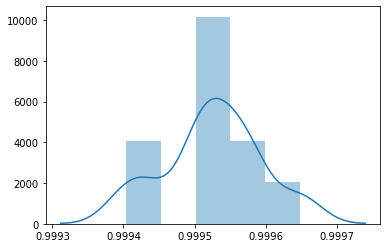

In [153]:
sns.distplot(xg_accuracy)

In [154]:
from sklearn.metrics import confusion_matrix
balanced_confusion3 = confusion_matrix(y1_test,prediction)
print(balanced_confusion3)

[[28428     3]
 [    9    40]]


In [155]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995259952278456

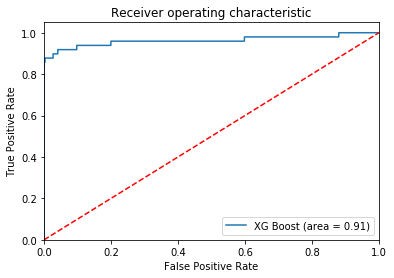

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [157]:
TP = balanced_confusion3[1,1] # true positive 
TN = balanced_confusion3[0,0] # true negatives
FP = balanced_confusion3[0,1] # false positives
FN = balanced_confusion3[1,0] # false negatives

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.93      0.82      0.87        49

    accuracy                           1.00     28480
   macro avg       0.96      0.91      0.93     28480
weighted avg       1.00      1.00      1.00     28480



In [159]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.8163265306122449

In [160]:
# calculate specificity
TN / float(TN+FP)

0.9998944813759628

In balanced dataset by SMOTE also we can see that XG Boost is best performing model with Recall value of 81.632%. AUC = 91%

**Now check with ADASYN dataset**

In [161]:
X_ada_1 = X_ada.copy()

In [162]:
y_ada_1 = y_ada.copy()

#### Balanced Dataset with ADASYN |Decision Tree

In [163]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [164]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

In [165]:
dt_accuracy = []
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
for train_index,test_index in kf.split(X,y):
    print("Train: ", train_index,"Validation: ", test_index)
    X1_train,X1_test = X_ada.iloc[train_index],X_ada.iloc[test_index]
    y1_train,y1_test = y_ada.iloc[train_index],y_ada.iloc[test_index]
    dtree.fit(X1_train,y1_train)
    prediction = dtree.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    dt_accuracy.append(score)
print(dt_accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    15     22     23 ... 284792 284798 284801]
Train:  [     0      1      2 ... 284803 284805 284806] Validation:  [     7     24     34 ... 284749 284790 284804]
Train:  [     0      2      3 ... 284804 284805 284806] Validation:  [     1      8     10 ... 284771 284783 284794]
Train:  [     0      1      3 ... 284804 284805 284806] Validation:  [     2     36     39 ... 284785 284802 284803]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    13     18     27 ... 284787 284793 284795]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    20     32     33 ... 284786 284788 284796]
Train:  [     0      1      2 ... 284803 284804 284806] Validation:  [    21     37     42 ... 284780 284791 284805]
Train:  [     1      2      3 ... 284803 284804 284805] Validation:  [     0      4     11 ... 284797 284800 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validati

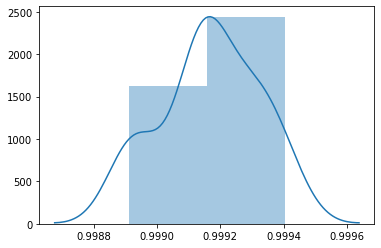

In [166]:
sns.distplot(dt_accuracy)

In [167]:
from sklearn.metrics import confusion_matrix
balanced_confusion1 = confusion_matrix(y1_test,prediction)
print(balanced_confusion1)

[[28420    11]
 [   13    36]]


In [168]:
# accuracy of the model:
np.array(dt_accuracy).mean()

0.9991678574204211

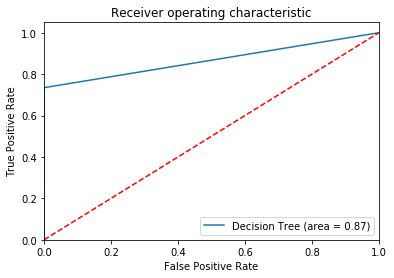

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, dtree.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, dtree.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [170]:
TP = balanced_confusion1[1,1] # true positive 
TN = balanced_confusion1[0,0] # true negatives
FP = balanced_confusion1[0,1] # false positives
FN = balanced_confusion1[1,0] # false negatives

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.77      0.73      0.75        49

    accuracy                           1.00     28480
   macro avg       0.88      0.87      0.87     28480
weighted avg       1.00      1.00      1.00     28480



In [172]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7346938775510204

#### Balanced Dataset with ADASYN |Random Forest

In [173]:
X_ada = X_ada_1.copy()
y_ada = y_ada_1.copy()

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
model_reg = RandomForestClassifier()

In [176]:
from sklearn.model_selection import StratifiedKFold
rf_accuracy=[]
rfc = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
rfc.get_n_splits(X,y)
for train_index,test_index in rfc.split(X,y):
    print("Train: ",train_index,"Validation: ",test_index)
    X1_train,X1_test = X_ada.iloc[train_index],X_ada.iloc[test_index]
    y1_train,y1_test = y_ada.iloc[train_index],y_ada.iloc[test_index]
    model_reg.fit(X1_train,y1_train)
    prediction = model_reg.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    rf_accuracy.append(score)
print(rf_accuracy)

Train:  [     0      1      3 ... 284804 284805 284806] Validation:  [     2     13     20 ... 284754 284800 284803]
Train:  [     1      2      3 ... 284804 284805 284806] Validation:  [     0      4      8 ... 284781 284783 284794]
Train:  [     0      1      2 ... 284803 284805 284806] Validation:  [     7     11     27 ... 284789 284798 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    33     45     61 ... 284782 284786 284795]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    14     18     31 ... 284793 284797 284802]
Train:  [     0      1      2 ... 284803 284804 284806] Validation:  [    16     17     24 ... 284780 284792 284805]
Train:  [     0      2      3 ... 284803 284804 284805] Validation:  [     1     12     19 ... 284768 284769 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    15     32     38 ... 284787 284799 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validati

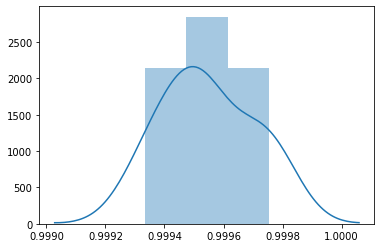

In [177]:
sns.distplot(rf_accuracy)

In [178]:
from sklearn.metrics import confusion_matrix
balanced_confusion2 = confusion_matrix(y1_test,prediction)
print(balanced_confusion2)

[[28427     4]
 [   10    39]]


In [179]:
# accuracy of the model:
np.array(rf_accuracy).mean()

0.9995470614107413

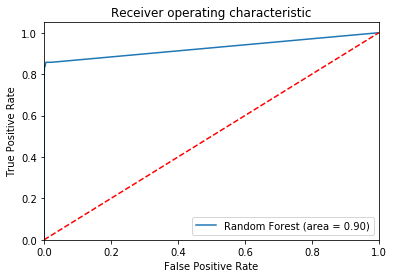

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, model_reg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_reg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [181]:
TP = balanced_confusion2[1,1] # true positive 
TN = balanced_confusion2[0,0] # true negatives
FP = balanced_confusion2[0,1] # false positives
FN = balanced_confusion2[1,0] # false negatives

In [182]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7959183673469388

In [183]:
# calculate specificity
TN / float(TN+FP)

0.9998593085012838

#### Balanced Dataset with ADSYN |XG Boost

In [184]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [185]:
X_ada = X_ada_1.copy()
y_ada = y_ada_1.copy()

In [186]:
from sklearn.model_selection import StratifiedKFold
xg_accuracy=[]
xgb = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
xgb.get_n_splits(X,y)
for train_index,test_index in xgb.split(X,y):
    print("Train: ",train_index,"Validatio: ",test_index)
    X1_train,X1_test = X_ada.iloc[train_index],X_ada.iloc[test_index]
    y1_train,y1_test = y_ada.iloc[train_index],y_ada.iloc[test_index]
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    xg_accuracy.append(score)
print(xg_accuracy)


Train:  [     0      1      2 ... 284803 284804 284805] Validatio:  [    16     18     34 ... 284749 284755 284806]
Train:  [     0      1      2 ... 284803 284805 284806] Validatio:  [    15     56     67 ... 284799 284802 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    12     21     47 ... 284761 284771 284798]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    26     33     40 ... 284777 284793 284795]
Train:  [     0      2      3 ... 284804 284805 284806] Validatio:  [     1      8     13 ... 284752 284781 284790]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     7     38     49 ... 284746 284760 284794]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [    20     24     25 ... 284778 284789 284792]
Train:  [     0      1      2 ... 284804 284805 284806] Validatio:  [     5      6     11 ... 284788 284791 284800]
Train:  [     0      1      2 ... 284803 284804 284806] Validatio:  [   

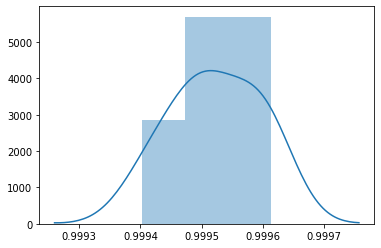

In [187]:
sns.distplot(xg_accuracy)

In [188]:
from sklearn.metrics import confusion_matrix
balanced_confusion3 = confusion_matrix(y1_test,prediction)
print(balanced_confusion3)

[[28427     4]
 [    7    42]]


In [189]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995224841151739

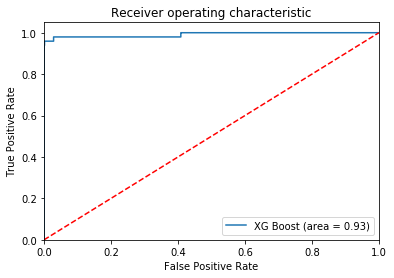

In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [191]:
TP = balanced_confusion3[1,1] # true positive 
TN = balanced_confusion3[0,0] # true negatives
FP = balanced_confusion3[0,1] # false positives
FN = balanced_confusion3[1,0] # false negatives


In [192]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.91      0.86      0.88        49

    accuracy                           1.00     28480
   macro avg       0.96      0.93      0.94     28480
weighted avg       1.00      1.00      1.00     28480



In [193]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)


0.8571428571428571

In [194]:
# calculate specificity
TN / float(TN+FP)


0.9998593085012838

Hence here also we can see that XG Boost is performing best with recall 85.71% and AUC = 93%

### Oversampling by Randomoversampler

In [195]:
# Store independant variables to X
X = df.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df['Class']

In [196]:
from imblearn.over_sampling import RandomOverSampler

In [197]:
ros=RandomOverSampler(0.75)

In [198]:
X_ros, y_ros = ros.fit_sample(X, y)
y_ros.value_counts()

0    284315
1    213236
Name: Class, dtype: int64

In [199]:
X_ros_1  = X_ros.copy()

In [200]:
y_ros_1 = y_ros.copy()

####  Balanced Dataset with Random Over Sampling |Descision Tree

In [201]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [202]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

In [203]:
dt_accuracy = []
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
for train_index,test_index in kf.split(X,y):
    print("Train: ", train_index,"Validation: ", test_index)
    X1_train,X1_test = X_ros.iloc[train_index],X_ros.iloc[test_index]
    y1_train,y1_test = y_ros.iloc[train_index],y_ros.iloc[test_index]
    dtree.fit(X1_train,y1_train)
    prediction = dtree.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    dt_accuracy.append(score)
print(dt_accuracy)

Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    30     43     53 ... 284774 284788 284799]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    32     36     48 ... 284795 284798 284802]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     4     15     24 ... 284777 284784 284803]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     6     39     62 ... 284791 284793 284794]
Train:  [     0      1      2 ... 284803 284805 284806] Validation:  [     5     11     28 ... 284783 284785 284804]
Train:  [     0      2      3 ... 284804 284805 284806] Validation:  [     1      9     10 ... 284751 284760 284768]
Train:  [     0      1      4 ... 284804 284805 284806] Validation:  [     2      3     19 ... 284779 284786 284790]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    16     18     25 ... 284713 284756 284772]
Train:  [     0      1      2 ... 284802 284803 284804] Validati

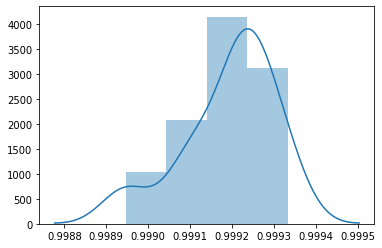

In [204]:
sns.distplot(dt_accuracy)

In [205]:
from sklearn.metrics import confusion_matrix
balanced_confusion1 = confusion_matrix(y1_test,prediction)
print(balanced_confusion1)

[[28418    13]
 [    9    40]]


In [206]:
TP = balanced_confusion1[1,1] # true positive 
TN = balanced_confusion1[0,0] # true negatives
FP = balanced_confusion1[0,1] # false positives
FN = balanced_confusion1[1,0] # false negatives

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.75      0.82      0.78        49

    accuracy                           1.00     28480
   macro avg       0.88      0.91      0.89     28480
weighted avg       1.00      1.00      1.00     28480



In [208]:
# accuracy of the model:
np.array(dt_accuracy).mean()

0.9991924358255394

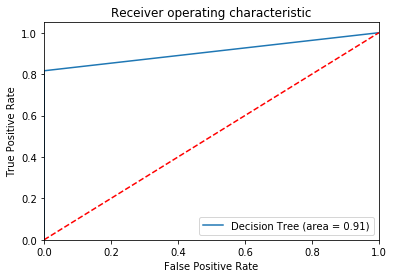

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, dtree.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, dtree.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [210]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.8163265306122449

#### Balanced Dataset with Random Over Sampler| Random Forest

In [211]:
X_ros = X_ros_1.copy()
y_ros = y_ros_1.copy()

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
model_reg = RandomForestClassifier()

In [214]:
from sklearn.model_selection import StratifiedKFold
rf_accuracy=[]
rfc = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
rfc.get_n_splits(X,y)
for train_index,test_index in rfc.split(X,y):
    print("Train: ",train_index,"Validation: ",test_index)
    X1_train,X1_test = X_ros.iloc[train_index],X_ros.iloc[test_index]
    y1_train,y1_test = y_ros.iloc[train_index],y_ros.iloc[test_index]
    model_reg.fit(X1_train,y1_train)
    prediction = model_reg.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    rf_accuracy.append(score)
print(rf_accuracy)

Train:  [     0      1      2 ... 284802 284803 284804] Validation:  [    30     41     46 ... 284796 284805 284806]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     7     11     23 ... 284789 284794 284801]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    12     19     28 ... 284776 284786 284800]
Train:  [     0      3      4 ... 284802 284805 284806] Validation:  [     1      2      5 ... 284777 284803 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     8     21     25 ... 284775 284785 284787]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     9     18     27 ... 284749 284757 284795]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    16     22     51 ... 284792 284797 284798]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    24     34     72 ... 284784 284791 284802]
Train:  [     0      1      2 ... 284804 284805 284806] Validati

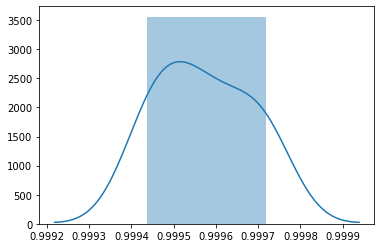

In [215]:
sns.distplot(rf_accuracy)

In [216]:
from sklearn.metrics import confusion_matrix
balanced_confusion2 = confusion_matrix(y1_test,prediction)
print(balanced_confusion2)

[[28428     3]
 [   11    38]]


In [217]:
# accuracy of the model:
np.array(rf_accuracy).mean()

0.9995716394460095

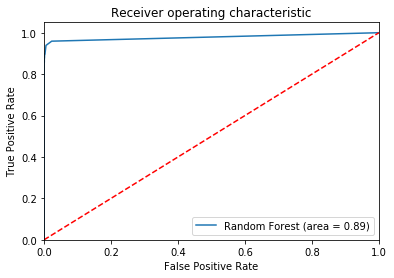

In [218]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, model_reg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_reg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [219]:
TP = balanced_confusion2[1,1] # true positive 
TN = balanced_confusion2[0,0] # true negatives
FP = balanced_confusion2[0,1] # false positives
FN = balanced_confusion2[1,0] # false negatives

In [220]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.7755102040816326

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.93      0.78      0.84        49

    accuracy                           1.00     28480
   macro avg       0.96      0.89      0.92     28480
weighted avg       1.00      1.00      1.00     28480



#### Balanced Dataset with Random Over Sampler |XG Boost

In [222]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [223]:
X_ros = X_ros_1.copy()
y_ros = y_ros_1.copy()

In [224]:
from sklearn.model_selection import StratifiedKFold
xg_accuracy=[]
xgb = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)
xgb.get_n_splits(X,y)
for train_index,test_index in xgb.split(X,y):
    print("Train: ",train_index,"Validation: ",test_index)
    X1_train,X1_test = X_ros.iloc[train_index],X_ros.iloc[test_index]
    y1_train,y1_test = y_ros.iloc[train_index],y_ros.iloc[test_index]
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    xg_accuracy.append(score)
print(xg_accuracy)


Train:  [     1      2      3 ... 284804 284805 284806] Validation:  [     0     12     23 ... 284775 284787 284794]
Train:  [     0      1      2 ... 284803 284804 284806] Validation:  [     9     10     20 ... 284778 284786 284805]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     8     14     32 ... 284793 284797 284799]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    13     16     26 ... 284789 284791 284792]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [    24     46     48 ... 284785 284796 284801]
Train:  [     0      1      2 ... 284803 284805 284806] Validation:  [    17     21     39 ... 284798 284802 284804]
Train:  [     0      1      2 ... 284804 284805 284806] Validation:  [     5      6     11 ... 284773 284782 284800]
Train:  [     0      2      5 ... 284804 284805 284806] Validation:  [     1      3      4 ... 284784 284795 284803]
Train:  [     0      1      3 ... 284804 284805 284806] Validati

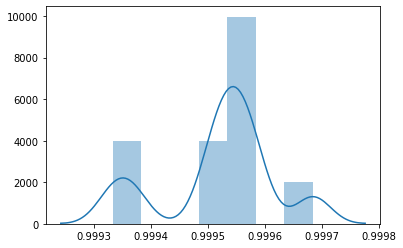

In [225]:
sns.distplot(xg_accuracy)

In [226]:
from sklearn.metrics import confusion_matrix
balanced_confusion3 = confusion_matrix(y1_test,prediction)
print(balanced_confusion3)

[[28426     5]
 [    8    41]]


In [227]:
# accuracy of the model:
np.array(xg_accuracy).mean()

0.9995189720162347

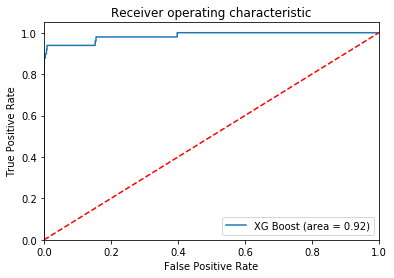

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y1_test, classifier.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [229]:
TP = balanced_confusion3[1,1] # true positive 
TN = balanced_confusion3[0,0] # true negatives
FP = balanced_confusion3[0,1] # false positives
FN = balanced_confusion3[1,0] # false negatives

In [230]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.8367346938775511

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.89      0.84      0.86        49

    accuracy                           1.00     28480
   macro avg       0.95      0.92      0.93     28480
weighted avg       1.00      1.00      1.00     28480



**We have seen that XG Boost is the best performing model so far. Hence, let us run only XG Boost for the all SMOTE,ADASYN and Oversample dataset but with train and test spilt**

### SMOTE

In [499]:
# Store independant variables to X
X = df.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df['Class']

In [500]:
print(X.shape,y.shape)

(284807, 29) (284807,)


In [503]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [504]:
from sklearn.model_selection import train_test_split

In [505]:
# Splitting the data into train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, 
                                                    test_size=0.30, 
                                                    random_state = 42)
print('X_train_smote:', X_train_smote.shape)
print('X_test_smote:', X_test_smote.shape)
print('y_train_smote:', y_train_smote.shape)
print('y_test_smote:', y_test_smote.shape)

X_train_smote: (398041, 29)
X_test_smote: (170589, 29)
y_train_smote: (398041,)
y_test_smote: (170589,)


In [506]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [507]:
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [508]:
print(parameters)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [509]:
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [510]:
random_search.fit(X_smote,y_smote)
#prediction = classifier.predict(X_test)
#score = accuracy_score(prediction,y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 31.0min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 33.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [511]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [512]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [519]:
classifier=xgboost.XGBClassifier()

In [520]:
classifier.fit(X_train_smote,y_train_smote)
y_pred_smote=classifier.predict(X_test_smote)

In [521]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [522]:
confusion1 = confusion_matrix(y_pred_smote,y_test_smote)
print(confusion1)

[[84177  3019]
 [  972 82421]]


In [523]:
print(classification_report(y_test_smote,y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.96      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [524]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [526]:
print(accuracy_score(y_test_smote,y_pred_smote))

0.9766045876346071


In [527]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.9883443454486588

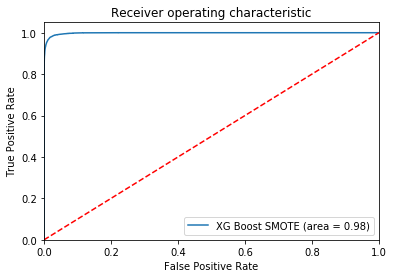

In [528]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test_smote, classifier.predict(X_test_smote))
fpr, tpr, thresholds = roc_curve(y_test_smote, classifier.predict_proba(X_test_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ADASYN

In [469]:
X_ada = X_ada_1.copy()
y_ada = y_ada_1.copy()

In [529]:
from sklearn.model_selection import train_test_split

In [530]:
# Splitting the data into train and test
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada, y_ada, 
                                                    test_size=0.30, 
                                                    random_state = 99)
print('X_train:', X_train_ada.shape)
print('X_test:', X_test_ada.shape)
print('y_train:', y_train_ada.shape)
print('y_test:', y_test_ada.shape)

X_train: (398035, 29)
X_test: (170587, 29)
y_train: (398035,)
y_test: (170587,)


In [531]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [532]:
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [533]:
print(parameters)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [534]:
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [535]:
random_search.fit(X_ada,y_ada)
#prediction = classifier.predict(X_test)
#score = accuracy_score(prediction,y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 25.3min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 31.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [536]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [542]:
classifier=xgboost.XGBClassifier()

In [543]:
classifier.fit(X_train_ada,y_train_ada)
y_pred_ada=classifier.predict(X_test_ada)

In [544]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [545]:
confusion1 = confusion_matrix(y_test,y_pred)
print(confusion1)

[[85098    38]
 [    0 85451]]


In [546]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85136
           1       1.00      1.00      1.00     85451

    accuracy                           1.00    170587
   macro avg       1.00      1.00      1.00    170587
weighted avg       1.00      1.00      1.00    170587



In [547]:
TP = confusion1[1,1] # true positive 
TN = confusion11[0,0] # true negatives
FP = confusion11[0,1] # false positives
FN = confusion11[1,0] # false negatives

In [548]:
print(accuracy_score(y_test,y_pred))

0.999777239766219


In [549]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

1.0

### Random Oversampler

In [552]:
# Store independant variables to X
X = df.drop(['Time','Class'], axis = 1)
# Store dependant variable to y
y = df['Class']

In [553]:
from imblearn.over_sampling import RandomOverSampler

In [554]:
ros=RandomOverSampler(0.75)

In [555]:
X_ros, y_ros = ros.fit_sample(X, y)

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
# Splitting the data into train and test
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, 
                                                    test_size=0.30, 
                                                    random_state = 99)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (398035, 29)
X_test: (170587, 29)
y_train: (398035,)
y_test: (170587,)


In [558]:
import xgboost
from xgboost.sklearn import XGBClassifier
classifier=xgboost.XGBClassifier()

In [559]:
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [560]:
print(parameters)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [561]:
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [562]:
random_search.fit(X_train_ros,y_train_ros)
#prediction = classifier.predict(X_test)
#score = accuracy_score(prediction,y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 17.6min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 18.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [563]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [564]:
classifier=xgboost.XGBClassifier()

In [565]:
classifier.fit(X_train_ros,y_train_ros)
y_pred_ros=classifier.predict(X_test_ros)

In [566]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [568]:
confusion1 = confusion_matrix(y_test_ros,y_pred_ros)
print(confusion1)

[[85072   424]
 [  742 63028]]


In [570]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     85496
           1       0.99      0.99      0.99     63770

    accuracy                           0.99    149266
   macro avg       0.99      0.99      0.99    149266
weighted avg       0.99      0.99      0.99    149266



In [571]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [572]:
print(accuracy_score(y_test,y_pred))

0.999777239766219


In [573]:
# Check the sensitivity or Recall or True Positive Rate.
TP / float(TP+FN)

0.988364434687157

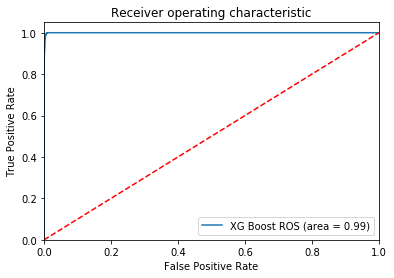

In [575]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test_ros, classifier.predict(X_test_ros))
fpr, tpr, thresholds = roc_curve(y_test_ros, classifier.predict_proba(X_test_ros)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost ROS (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

We can see that Random Over Sampler is giving highest reault for Recall value followed by SMOTE. Let us continue with Random Over Sampler dataset to check the feature importance

In [576]:
important_feature = pd.DataFrame(classifier.feature_importances_,
                                   index = X_train_ros.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [579]:
important_feature = pd.DataFrame(important_feature.reset_index())
important_feature.rename(columns={'index':'features'},inplace = True)

In [580]:
important_feature

,features,importance
0,V14,0.448565
1,V10,0.056972
2,V12,0.045817
3,V4,0.037252
4,V8,0.034214


In [583]:
important_feature_1 = important_feature.sort_values('importance',ascending=True) # this is for the bar graph
important_feature_1 = important_feature_1[important_feature_1['importance']>0.0]

Text(0.5, 1.0, 'Feature Importance')

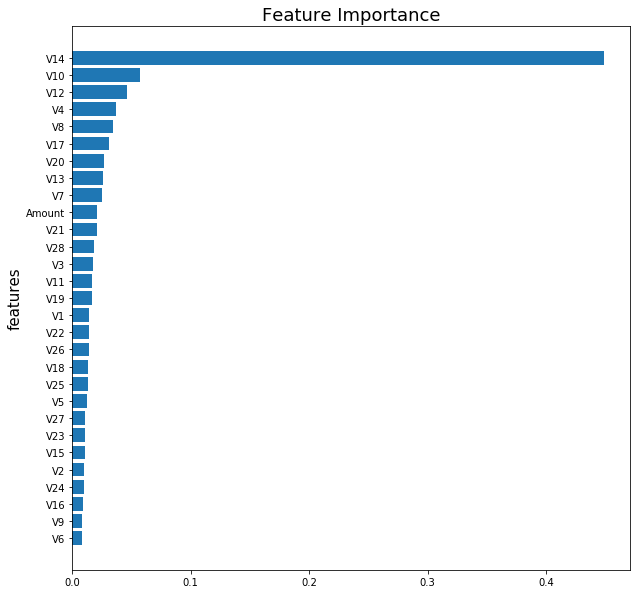

In [585]:
plt.figure(figsize=(10,10))
# bar plot with matplotlib
plt.barh('features', 'importance',data=important_feature_1)
plt.ylabel("features", size=15)
plt.title("Feature Importance", size=18)

### Evaluation Metric Summary

``Imbalanced Dataset with Stratified K fold Cross Validation``

     --Model                 Accuracy    Recall      AUC
     --Logistic Regression    0.9992      0.5918    0.8
     --Decision Tree          0.9991      0.7715    0.89
     --XG Boost               0.9995      0.8163    0.91
     --Random Forest          0.9995      0.7346    0.87

``Balanced Dataset with Stratified K fold Cross Validation``

**SMOTE**

     --Model                 Accuracy    Recall      AUC
     --Decision Tree          0.9991      0.7959    0.9
     --Random Forest          0.9995      0.7551    0.88
     --XG Boost               0.9995      0.8163    0.91
     

**ADASYN**

     --Model                 Accuracy    Recall      AUC
     --Decision Tree          0.9991      0.7346    0.87
     --Random Forest          0.9995      0.7959    0.9
     --XG Boost               0.9995      0.8571    0.93
     
**Random Over Sampler**

     --Model                 Accuracy    Recall      AUC
     --Decision Tree          0.9991      0.8163    0.91
     --Random Forest          0.9995      0.7551    0.89
     --XG Boost               0.9995      0.8367    0.92

**We finalize that XG Boost is the model to continue with. Hence, Running the XG Boost with all the balanced dataset but with 
train and test split**

**XG BOOST with Train and Test Split**

     --Data set              Accuracy    Recall      AUC
     --SMOTE                  0.9766      0.9883    0.98
     --ADASYN                 1.0         1.0       1.0
     --Random OverSample      0.9997      0.9883    0.99
     
**Final Model: XG Boost with Random Over Sample Dataset** 
